# Лабораторная работа №1
### Воробей Владислав, 18.09.2019

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

## Задание 1

In [2]:
full_train = pd.read_csv('Data/Preprocessed/train.csv')
test = pd.read_csv('Data/Preprocessed/test.csv')

In [3]:
full_train.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PhotoAmt,AdoptionSpeed
0,Dog,NaN,2,Mixed Breed,Mixed Breed,2,Black,Brown,White,2,...,3,1,4,0,Melaka,59dd5e67149bb16fade497f16f091194,0,Kindly contact us if anyone is interested in a...,4,4
1,Dog,F9,2,Mixed Breed,Mixed Breed,2,Cream,Not_applied,Not_applied,2,...,2,1,1,0,Selangor,b53c34474d9e24574bcec6a3d3306a0d,0,For Adoption,4,2
2,Cat,Dylan,3,Domestic Medium Hair,Not_applied,1,Black,White,Not_applied,3,...,2,1,1,0,Kuala Lumpur,5be13320d12dc6478d94268d6e103e56,0,Didn't know mother cat was pregnant when we to...,6,2


In [4]:
# Выделение целевой переменной
train_y = full_train['AdoptionSpeed']
train = full_train.drop(['AdoptionSpeed'], axis=1)

In [5]:
print('Train shape:', train.shape)
print('Test shape:', test.shape)

Train shape: (11300, 22)
Test shape: (2826, 22)


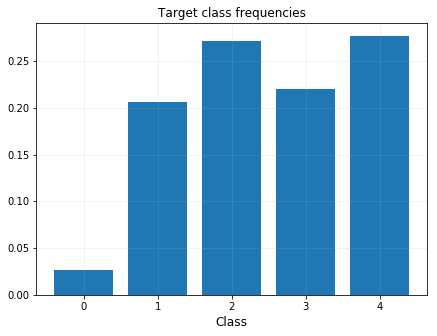

In [6]:
classes_freqs = train_y.value_counts(True)
classes_freqs = {idx: v for idx, v in zip(classes_freqs.index, classes_freqs.values)}

n_classes = len(classes_freqs.keys())

plt.figure(figsize=(7,5))
plt.bar(
    x=list(range(n_classes)),
    height=[classes_freqs[x] for x in range(n_classes)]
)
plt.xlabel('Class', fontsize=12)
plt.title("Target class frequencies")
plt.grid(alpha=0.2)
plt.show()

In [7]:
train.describe()

,Age,Gender,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,VideoAmt,PhotoAmt
count,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000
mean,10.579469,1.769735,1.869115,1.458496,1.719469,1.549469,1.904779,1.036195,1.569204,21.656372,0.058230,3.927168
std,18.528445,0.679361,0.540871,0.598072,0.668585,0.694468,0.563794,0.197828,1.468098,80.498608,0.353216,3.558310
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000
50%,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,3.000000
75%,11.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,5.000000
max,255.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,8.000000,30.000000


In [8]:
# Количество записей для каждого значения в колонке 'Type'
train['Type'].value_counts()

Dog    6285
Cat    5015
Name: Type, dtype: int64

In [9]:
# Доли значений в колонке 'Color1'
train['Color1'].value_counts(True).head(3)

Black     0.492478
Brown     0.253540
Golden    0.063717
Name: Color1, dtype: float64

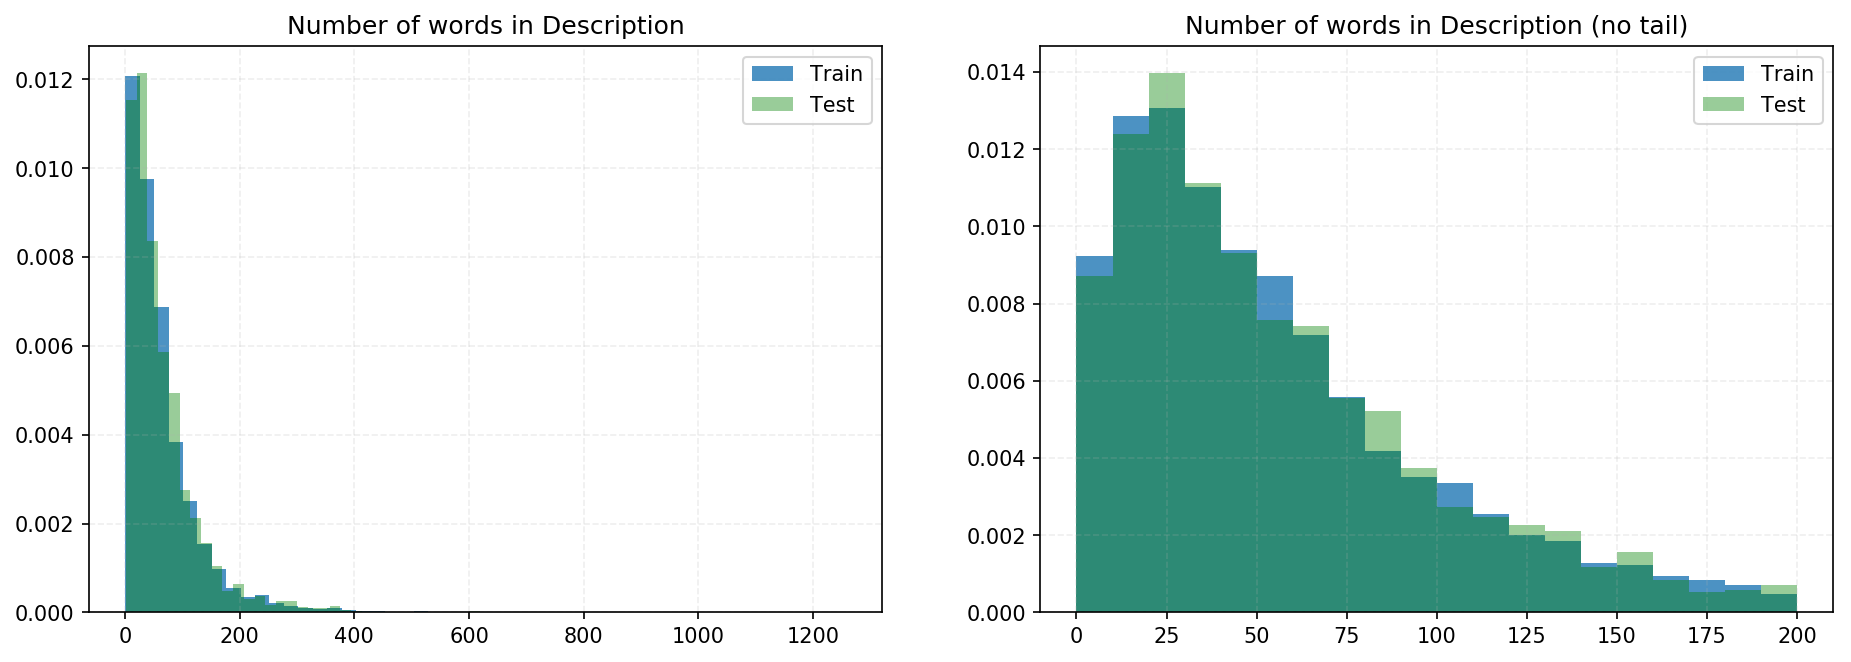

In [10]:
x1 = train['Description'].apply(lambda x: len(str(x).split()))
x2 = test['Description'].apply(lambda x: len(str(x).split()))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5), dpi=150)

ax1.hist(x1, bins=50, density=True, alpha=0.8, label='Train')
ax1.hist(x2, bins=50, density=True, color='g', alpha=0.4, label='Test')
ax1.legend()
ax1.set_title("Number of words in Description")
ax1.grid(alpha=0.2, linestyle='--')

ax2.hist(x1, bins=20, range=(0, 200), density=True, alpha=0.8, label='Train')
ax2.hist(x2, bins=20, range=(0, 200), density=True, color='g', alpha=0.4, label='Test')
ax2.legend()
ax2.set_title("Number of words in Description (no tail)")
ax2.grid(alpha=0.2, linestyle='--')

plt.show()

## Задание 2

In [11]:
def create_feature_df(feature_series, fraction_threshold=None):   
    column_name = feature_series.name
    
    if fraction_threshold is not None:
        used_feature_values = []
        total_fraction = 0.

        fracs = feature_series.value_counts(True)
        for idx, val in zip(fracs.index, fracs.values):

            used_feature_values.append(idx)
            total_fraction += val

            if total_fraction > fraction_threshold:
                break  

        new_feature_series = feature_series.apply(lambda x: x if x in used_feature_values else 'Other')

        print("For feature '%s'" % column_name, "the following values will be used:", used_feature_values) 
    else:
        new_feature_series = feature_series
        
    feature_df = pd.get_dummies(new_feature_series)
    # Rename new feature columns
    feature_df.rename(columns={col: column_name + '_' + col for col in feature_df.columns}, inplace=True)
        
    return feature_df


def preprocess_data(train_data, test_data, fraction_threshold=0.8, ignored_categorical_cols=[]):
    train_size = train_data.shape[0]
    
    full_df = pd.concat([train_data, test_data])
        
    # Find numeric columns
    numeric_cols = []
    for col, dtype in zip(full_df.columns, full_df.dtypes):
        if 'int' in str(dtype) or 'float' in str(dtype):
            numeric_cols.append(col)
    
    # Start building new dataframe
    preprocessed_df = full_df[numeric_cols] 
    
    # Process categorical features
    categorical_features = []
    ignored_features = set(numeric_cols + ignored_categorical_cols)
    for col in full_df.columns:
        if col not in ignored_features:
            categorical_features.append(col)
    
    for col in categorical_features:
        print("\nProcessing feature '%s'" % col, "...")
        new_feature_df = create_feature_df(full_df[col], fraction_threshold=fraction_threshold)
        preprocessed_df = pd.concat([preprocessed_df, new_feature_df], axis=1)
    print("Finished processing categorical features!\n")
    
    # Add custom preprocessing here

    new_train = preprocessed_df.iloc[:train_size]
    new_test = preprocessed_df.iloc[train_size:]
    
    return new_train, new_test

In [12]:
# Пример использования функции create_feature_df
create_feature_df(train['Color1'], fraction_threshold=0.85).head(10)

For feature 'Color1' the following values will be used: ['Black', 'Brown', 'Golden', 'Cream']


,Color1_Black,Color1_Brown,Color1_Cream,Color1_Golden,Color1_Other
0,1,0,0,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
6,0,0,0,0,1
7,0,0,0,0,1
8,0,1,0,0,0
9,0,0,0,1,0


In [13]:
%%time

# Полная предобработка признаков для train и test

ignored_categorical_cols = ['Description', 'RescuerID', 'Name']

train_x, test_x = preprocess_data(
    train, test, fraction_threshold=0.8, ignored_categorical_cols=ignored_categorical_cols
)


Processing feature 'Type' ...
For feature 'Type' the following values will be used: ['Dog', 'Cat']

Processing feature 'Breed1' ...
For feature 'Breed1' the following values will be used: ['Mixed Breed', 'Domestic Short Hair', 'Domestic Medium Hair', 'Tabby', 'Domestic Long Hair', 'Siamese', 'Labrador Retriever', 'Persian']

Processing feature 'Breed2' ...
For feature 'Breed2' the following values will be used: ['Not_applied', 'Mixed Breed']

Processing feature 'Color1' ...
For feature 'Color1' the following values will be used: ['Black', 'Brown', 'Golden']

Processing feature 'Color2' ...
For feature 'Color2' the following values will be used: ['Not_applied', 'White', 'Brown', 'Cream']

Processing feature 'Color3' ...
For feature 'Color3' the following values will be used: ['Not_applied', 'White']

Processing feature 'State' ...
For feature 'State' the following values will be used: ['Selangor', 'Kuala Lumpur']
Finished processing categorical features!

Wall time: 83 ms


In [14]:
print("Preprocessed train shape:", train_x.shape)
print("Preprocessed test shape:", test_x.shape)

Preprocessed train shape: (11300, 41)
Preprocessed test shape: (2826, 41)


### Нормирование данных

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
%%time

scaler = StandardScaler()

# Сперва стандартизируется тренировочный набор, а затем полученная информация используется для тестовых данных
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

Wall time: 39 ms


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


### Кросс-валидация

In [17]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier

In [18]:
lgbm_clf = LGBMClassifier(
    random_state=42,
    n_jobs=-1
)

In [19]:
%%time
cv_scores = cross_val_score(lgbm_clf, train_x, train_y, scoring='accuracy', cv=10, n_jobs=1)

Wall time: 6.64 s


In [20]:
print("Results for LightGBM: mean={:0.6f}, std={:0.6f}".format(cv_scores.mean(), cv_scores.std()))

Results for LightGBM: mean=0.396979, std=0.014560


In [21]:
# Для проведения кросс-валидации со стандартизацией данных удобно использовать sklearn.pipeline.Pipeline

## Задание 3

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
count_vect = CountVectorizer(
    ngram_range=(1, 3),
    analyzer='word',
    min_df=3
)

In [24]:
%%time
cvect_train_transformed = count_vect.fit_transform(train['Description'])
cvect_test_transformed = count_vect.transform(test['Description'])

Wall time: 6.13 s


In [25]:
# Подсчет вхождений каждого словосочетания в train/test
cvect_features = np.array(count_vect.get_feature_names())
cvect_train_sum = np.array(cvect_train_transformed.sum(axis=0).tolist()[0])
cvect_test_sum = np.array(cvect_test_transformed.sum(axis=0).tolist()[0])

n_top = 50

# Выбор n_top наиболее популярных значений для train/test
train_sum_order = np.argsort(cvect_train_sum)[::-1]
train_top_features = cvect_features[train_sum_order][:n_top]
train_top_sum = cvect_train_sum[train_sum_order][:n_top]

test_sum_order = np.argsort(cvect_test_sum)[::-1]
test_top_features = cvect_features[test_sum_order][:n_top]
test_top_sum = cvect_test_sum[test_sum_order][:n_top]

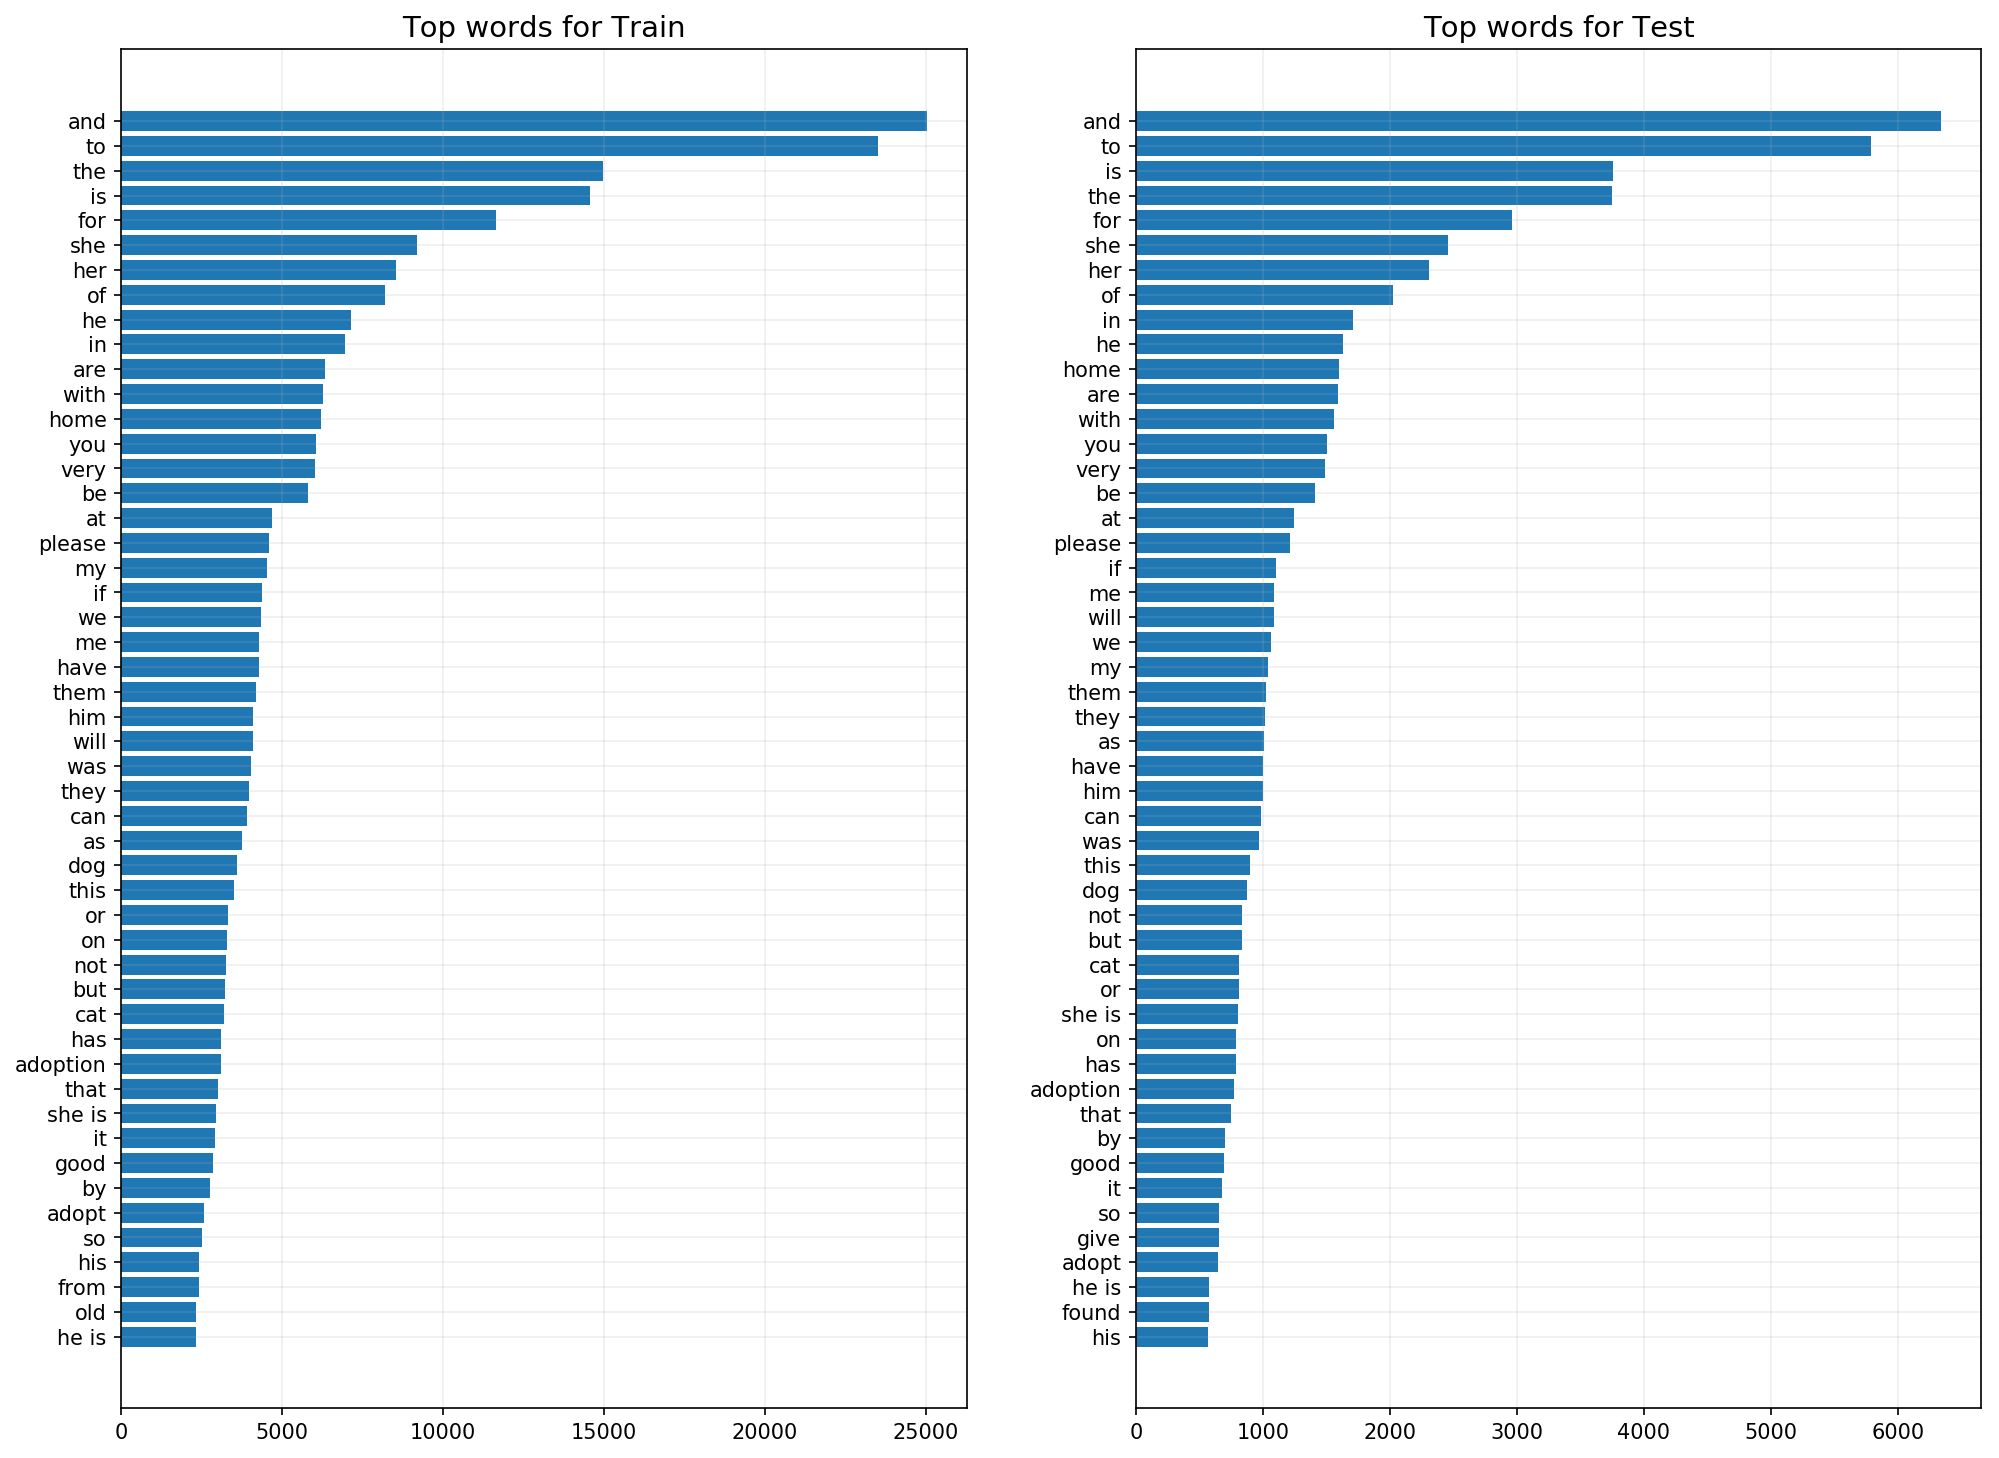

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,12), dpi=150)

# Для отображения столбцов по убыванию сверху-вниз нужно брать все значения в обратном порядке

ax1.barh(range(n_top), train_top_sum[::-1])
ax1.grid(alpha=0.2)
ax1.set_title("Top words for Train", fontsize=14)
ax1.set_yticks(range(n_top))
ax1.set_yticklabels(train_top_features[::-1])

ax2.barh(range(n_top), test_top_sum[::-1])
ax2.grid(alpha=0.2)
ax2.set_title("Top words for Test", fontsize=14)
ax2.set_yticks(range(n_top))
ax2.set_yticklabels(test_top_features[::-1])

plt.show()

### Кросс-валидация модели

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [28]:
count_vect = CountVectorizer(
    ngram_range=(1, 3),
    analyzer='word',
    min_df=3
)

multi_nb = MultinomialNB()

text_clf = Pipeline([
    ('vect', count_vect),
    ('clf', multi_nb),
])

In [29]:
%%time
cv_scores = cross_val_score(text_clf, train['Description'], train_y, scoring='accuracy', cv=10, n_jobs=1)

Wall time: 43.1 s


In [30]:
print(
    "Results for CountVectorizer with MultinomialNB on profile text description: mean={:0.6f}, std={:0.6f}".format(
        cv_scores.mean(), cv_scores.std()
    )
)

Results for CountVectorizer with MultinomialNB on profile text description: mean=0.379201, std=0.009155


## Построение прогнозов

In [31]:
lgbm_clf = LGBMClassifier(
    random_state=42,
    n_jobs=-1
)

In [32]:
%%time
lgbm_clf.fit(train_x, train_y)

Wall time: 676 ms


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [33]:
test_preds = lgbm_clf.predict(test_x)
test_preds

array([1, 4, 1, ..., 3, 2, 3], dtype=int64)

In [34]:
test_preds_df = pd.DataFrame({'Class': test_preds})
test_preds_df.head()

,Class
0,1
1,4
2,1
3,3
4,4


In [35]:
test_preds_df.to_csv('submission_ВоробейВладислав.csv', index=False)